In [7]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


### Búsqueda de la configuración idónea con una muestra pequeña

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# Cargar los datos
data = pd.read_csv('Datos_Limpios/UCL2017-2018.csv')

# Codificar los nombres de los equipos
label_encoder = LabelEncoder()
data['Home Team'] = label_encoder.fit_transform(data['Home Team'])
data['Away Team'] = label_encoder.transform(data['Away Team'])

# Crear una columna para representar el resultado del partido
data['Result'] = data['Home Goals'] - data['Away Goals']
data['Result'] = data['Result'].apply(
    lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Dividir los datos en características (X) y variable objetivo (y)
X = data[['Home Team', 'Away Team']]
y = data['Result']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

ajustes = []
capas = ["softmax", "relu", "sigmoid", "tanh", "linear"]
optimizador = ["SGD", "RMSprop", "Adam", "AdamW", "Adadelta",
               "Adagrad", "Adamax", "Adafactor", "Nadam", "Ftrl", "Lion"]


num_capas = [1, 2, 3, 4, 5]
num_neuronas = [8, 16, 32, 64, 128]
learning_rate = [0.1, 0.01, 0.001, 0.0001, 0.00001]

target_accuracy = 0.6
target_loss = 0.4

for _ in range(40):
    # Configuración aleatoria
    configuracion_aleatoria = {
        "capa_activacion": random.choice(capas),
        "optimizador": random.choice(optimizador),
        "num_capas": random.choice(num_capas),
        "num_neuronas": random.choice(num_neuronas),
        "learning_rate": random.choice(learning_rate)
    }

    # Crear el modelo con la configuración aleatoria
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(
        configuracion_aleatoria["num_neuronas"], input_dim=2, activation=configuracion_aleatoria["capa_activacion"]))
    for _ in range(configuracion_aleatoria["num_capas"] - 1):
        model.add(tf.keras.layers.Dense(
            configuracion_aleatoria["num_neuronas"], activation=configuracion_aleatoria["capa_activacion"]))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compilar el modelo con el optimizador y learning rate aleatorio
    optimizer = getattr(tf.keras.optimizers, configuracion_aleatoria["optimizador"])(
        learning_rate=configuracion_aleatoria["learning_rate"])
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=50, batch_size=64)

    # Evaluar el modelo
    loss, accuracy = model.evaluate(X_test, y_test)


    # Verificar si se alcanzaron las condiciones de término
    if accuracy >= target_accuracy and 0 <= loss <= target_loss:
        break

    # Si no se alcanzaron las condiciones de término, se guarda la configuración y se ordena por precisión en orden ascendente y evitando duplicados
    ajustes.append((configuracion_aleatoria, accuracy, loss))
    print(ajustes)

    #guardalo en un archivo txt

    # Guardar en un archivo txt
    with open('ajustes.txt', 'w') as f:
        for item in ajustes:
            f.write("%s\n" % str(item))



# Graficar la pérdida y la precisión
print("EL modelo alcanzó la precisión y la pérdida deseadas usando la siguiente configuración:")
print(configuracion_aleatoria)


plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

Epoch 1/50


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3152 - loss: 2.8007
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3583 - loss: 2.5546 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3294 - loss: 2.3898 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3123 - loss: 2.2135 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3094 - loss: 2.0390 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2923 - loss: 1.9333 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2975 - loss: 1.8058 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2871 - loss: 1.7283 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2975 - loss: 1.6085 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2544 - loss: 1.5038 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2804 - loss: 1.4470 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2462 - loss: 1.3890 
Epoch 13/50


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2315 - loss: 0.6896
Epoch 37/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2367 - loss: 0.6896 
Epoch 38/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2158 - loss: 0.6896
Epoch 39/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2471 - loss: 0.6895 
Epoch 40/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2367 - loss: 0.6896 
Epoch 41/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2471 - loss: 0.6895
Epoch 42/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2315 - loss: 0.6895 
Epoch 43/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2315 - loss: 0.6895 
Epoch 44/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2158 - loss: 0.6894
Epoch 45/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2210 - loss: 0.6894
Epoch 46/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2419 - loss: 0.6894
Epoch 47/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2315 - loss: 0.6894  
Epo

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from keras.utils import to_categorical


# Cargar los datos
data = pd.read_csv('Datos_Limpios/UCL2017-2018.csv')

# Codificar los nombres de los equipos
label_encoder = LabelEncoder()
data['Home Team'] = label_encoder.fit_transform(data['Home Team'])
data['Away Team'] = label_encoder.transform(data['Away Team'])

# Crear una columna para representar el resultado del partido
data['Result'] = data['Home Goals'] - data['Away Goals']
data['Result'] = data['Result'].apply(
    lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Dividir los datos en características (X) y variable objetivo (y)
X = data[['Home Team', 'Away Team']]
y = data['Result']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

ajustes = []
capas = ["softmax", "relu", "sigmoid", "tanh", "linear"]
optimizador = ["SGD", "RMSprop", "Adam", "AdamW", "Adadelta",
               "Adagrad", "Adamax", "Adafactor", "Nadam", "Ftrl", "Lion"]

batchs = [16, 32, 64, 128, 256]


num_capas = [1, 2, 3, 4, 5]
num_neuronas = [8, 16, 32, 64, 128]
learning_rate = [0.1, 0.01, 0.001, 0.0001, 0.00001]

target_accuracy = 0.8
target_loss = 0.2

while True:
    # Configuración aleatoria
    configuracion_aleatoria = {
        "capa_activacion": random.choice(capas),
        "optimizador": random.choice(optimizador),
        "num_capas": random.choice(num_capas),
        "num_neuronas": random.choice(num_neuronas),
        "learning_rate": random.choice(learning_rate),
        "batchs": random.choice(batchs)
    }

    # Crear el modelo con la configuración aleatoria
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(
        configuracion_aleatoria["num_neuronas"], input_dim=2, activation=configuracion_aleatoria["capa_activacion"]))
    for _ in range(configuracion_aleatoria["num_capas"] - 1):
        model.add(tf.keras.layers.Dense(
            configuracion_aleatoria["num_neuronas"], activation=configuracion_aleatoria["capa_activacion"]))
    model.add(tf.keras.layers.Dense(2, activation='softmax'))

    # Compilar el modelo con el optimizador y learning rate aleatorio
    optimizer = getattr(tf.keras.optimizers, configuracion_aleatoria["optimizador"])(
        learning_rate=configuracion_aleatoria["learning_rate"])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy', metrics=['accuracy'])

    # Convertir las etiquetas de clase a la codificación one-hot
    """y_train_encoded = to_categorical(y_train)
    y_test_encoded = to_categorical(y_test)"""

    # Entrenar el modelo
    history = model.fit(X_train, y_train, epochs=100,
                        batch_size=configuracion_aleatoria["batchs"])

    # Evaluar el modelo
    loss, accuracy = model.evaluate(X_test, y_test)

    # Verificar si se alcanzaron las condiciones de término
    if accuracy >= target_accuracy and 0 <= loss <= target_loss:
        break

    # Si no se alcanzaron las condiciones de término, se guarda la configuración y se ordena por precisión en orden ascendente y evitando duplicados
    ajustes.append((configuracion_aleatoria, accuracy, loss))


# Guardar en un archivo txt
    with open('ajustes.txt', 'w') as f:
        for item in ajustes:
            f.write("%s\n" % str(item))

# Graficar la pérdida y la precisión
print("EL modelo alcanzó la precisión y la pérdida deseadas usando la siguiente configuración:")
print(configuracion_aleatoria)

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

Epoch 1/100


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 2)

Epoch 1/100


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py:22: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2710 - loss: 0.0000e+00  
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2013 - loss: 0.0000e+00 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2360 - loss: 0.0000e+00 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2289 - loss: 0.0000e+00 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2283 - loss: 0.0000e+00 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2213 - loss: 0.0000e+00 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2165 - loss: 0.0000e+00 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2322 - loss: 0.0000e+00 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2393 - loss: 0.0000e+00 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2308 - loss: 0.0000e+00 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2502 - loss: 0.0000e+00 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 

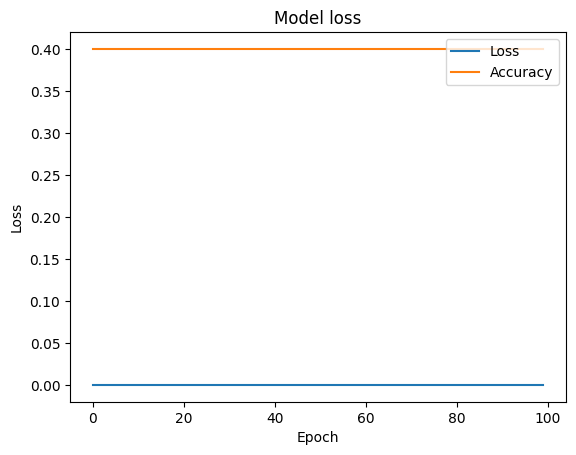

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from keras.utils import to_categorical
import time

# Cargar los datos
data = pd.read_csv('Datos_Limpios/UCL2017-2018.csv')

# Codificar los nombres de los equipos
label_encoder = LabelEncoder()
data['Home Team'] = label_encoder.fit_transform(data['Home Team'])
data['Away Team'] = label_encoder.transform(data['Away Team'])

# Crear una columna para representar el resultado del partido
data['Result'] = data['Home Goals'] - data['Away Goals']
data['Result'] = data['Result'].apply(
    lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# Dividir los datos en características (X) y variable objetivo (y)
X = data[['Home Team', 'Away Team']]
y = data['Result']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

ajustes = []
capas = ["softmax", "relu", "sigmoid", "tanh", "linear"]
optimizador = ["SGD", "RMSprop", "Adam", "AdamW", "Adadelta",
               "Adagrad", "Adamax", "Adafactor", "Nadam", "Ftrl", "Lion"]

batchs = [16, 32, 64, 128, 256]

num_capas = [1, 2, 3, 4, 5]
num_neuronas = [8, 16, 32, 64, 128]
learning_rate = [0.1, 0.01, 0.001, 0.0001, 0.00001]

target_accuracy = 0.7
target_loss = 0.1

for i in range (70):
    # Configuración aleatoria
    configuracion_aleatoria = {
        "capa_activacion": random.choice(capas),
        "optimizador": random.choice(optimizador),
        "num_capas": random.choice(num_capas),
        "num_neuronas": random.choice(num_neuronas),
        "learning_rate": random.choice(learning_rate),
        "batchs": random.choice(batchs)
    }

   # Leer el contenido del archivo
    with open('ajustes2.txt', 'r') as f:
        lines = f.readlines()

    # Convertir cada línea en un diccionario de Python
    configurations = [eval(line.strip()) for line in lines]

    # Verificar si la configuración ya ha sido utilizada quitando accuracy y loss del diccionario es decir esas keys no las necesitamos

    if configuracion_aleatoria in configurations:
        print("La configuración ya ha sido utilizada")
    else:

        # Crear el modelo con la configuración aleatoria
        model = tf.keras.models.Sequential()
        model.add(tf.keras.layers.Dense(
            configuracion_aleatoria["num_neuronas"], input_dim=2, activation=configuracion_aleatoria["capa_activacion"]))
        for _ in range(configuracion_aleatoria["num_capas"] - 1):
            model.add(tf.keras.layers.Dense(
                configuracion_aleatoria["num_neuronas"], activation=configuracion_aleatoria["capa_activacion"]))

        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

        # Compilar el modelo con el optimizador y learning rate aleatorio
        optimizer = getattr(tf.keras.optimizers, configuracion_aleatoria["optimizador"])(
            learning_rate=configuracion_aleatoria["learning_rate"])
        model.compile(optimizer=optimizer,
                    loss='categorical_crossentropy', metrics=['accuracy'])

        # Convertir las etiquetas de clase a la codificación one-hot
        """ y_train_encoded = to_categorical(y_train)
        y_test_encoded = to_categorical(y_test)"""
        # Entrenar el modelo
        history = model.fit(X_train, y_train, epochs=100,
                            batch_size=configuracion_aleatoria["batchs"])

        # Evaluar el modelo
        loss, accuracy = model.evaluate(X_test, y_test)

        ajustes.append(configuracion_aleatoria)

        time.sleep(3)

        # guardalo en ajustes2.txt
        with open('ajustes2.txt', 'a') as f:
            for item in ajustes:
                f.write("%s\n" % str(item))
        ajustes = []

        if accuracy >= target_accuracy and 0 <= loss <= target_loss:
            print("Se alcanzó la precisión y la pérdida deseadas usando la siguiente configuración:")
            print(configuracion_aleatoria)
            break


# Graficar la pérdida y la precisión
print("El modelo alcanzó la precisión y la pérdida deseadas usando la siguiente configuración:")
print(configuracion_aleatoria)

print("La precisión fue de: ", accuracy)
print("La pérdida fue de: ", loss)

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()


{'capa_activacion': 'tanh', 'optimizador': 'Lion', 'num_capas': 4, 'num_neuronas': 16, 'learning_rate': 0.001, 'batchs': 256}

target_accuracy > 0.7

target_loss < 0.4

{'capa_activacion': 'tanh', 'optimizador': 'Adam', 'num_capas': 5, 'num_neuronas': 32, 'learning_rate': 0.01, 'batchs': 16}

La precisión fue de:  0.8799999952316284

La pérdida fue de:  0.3883771002292633

{'capa_activacion': 'softmax', 'optimizador': 'SGD', 'num_capas': 1, 'num_neuronas': 64, 'learning_rate': 0.1, 'batchs': 16}
La precisión fue de:  0.8799999952316284
La pérdida fue de:  0.4175398647785187